## Intro

This is a usage example notebook for the elastic net method here.

The data will be set up from the _SKLEARN BOSTON DATA SET_ and each subsequent model will have a target variable specific for its distribution.

X and y (if necessary) will be standarized outside of the elastic net to use in statsmodels to compare the solutions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma

In [2]:
import ElasticNet as enet
from EnetUtilsParallel import *

In [4]:
xB, yB = load_boston(return_X_y = True)
boston = load_boston()
fn = boston.feature_names

ss = StandardScaler(with_mean=True, with_std=True)
X = ss.fit_transform(xB)
y = ss.fit_transform(yB.reshape(-1,1))

### Gaussian Data

C:\Users\schillw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


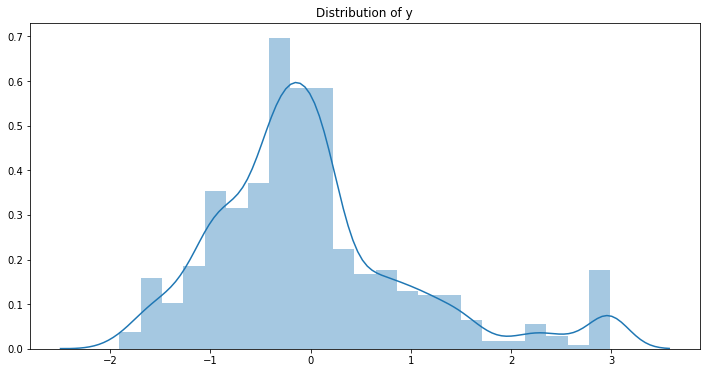

In [5]:
np.random.seed(123)

fig, ax=plt.subplots(1,1,figsize=(12,6))
sns.distplot(y, ax=ax);
plt.title('Distribution of y');

In [6]:
mod = enet.ElasticNet(X,y,offset=None,x_std=False,y_std=False,alpha=1.0,depth=99,tol=1e-9,fam='Gauss',
                      manual_lam_seq=None)

mod.fit()

sm = sma.OLS(y,sma.add_constant(X)).fit()

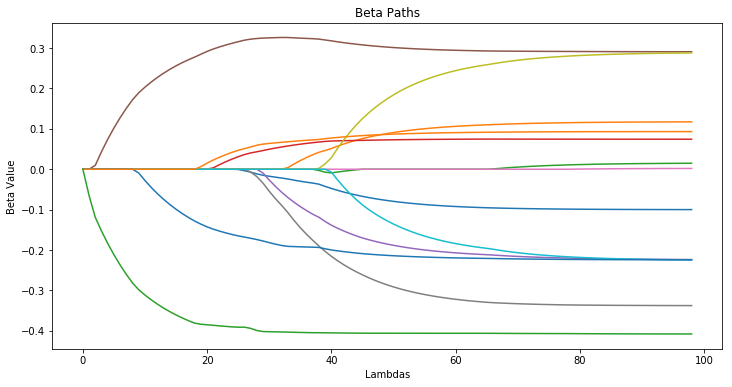

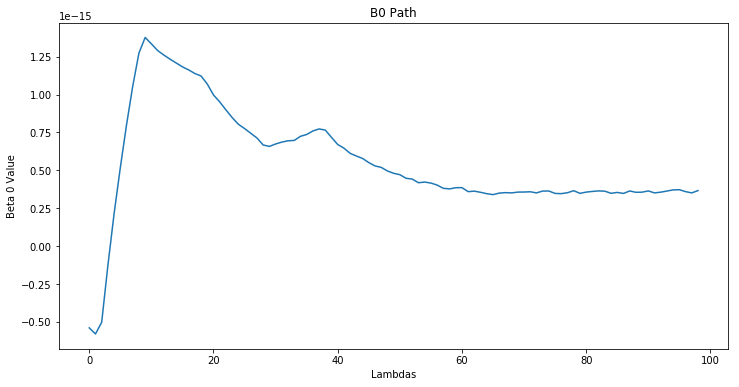

In [7]:
fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(mod.B.T);
plt.title('Beta Paths');
plt.xlabel('Lambdas');
plt.ylabel('Beta Value');

fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(mod.B0.T);
plt.title('B0 Path'); plt.xlabel('Lambdas'); plt.ylabel('Beta 0 Value');

In [8]:
temp = np.insert(mod.B.T[-1],0,mod.B0.T[-1])
# temp = np.insert(temp, len(temp), mod.K[:,-1])

index = np.insert(fn,0,'Constant')
# index = np.insert(index,len(index),'Dispersion')
chk = pd.concat( [ pd.DataFrame(np.round(temp.reshape(-1,1),6), index=index),
                   pd.DataFrame(np.round(sm.params.reshape(-1,1),6), index=index)],
                   axis=1, join='outer')
chk.columns = ['Gaussian Lasso Soln','StatsModels OLS Soln']
chk


,Gaussian Lasso Soln,StatsModels OLS Soln
Constan,0.000000,0.000000
CRIM,-0.099951,-0.100175
ZN,0.117262,0.117651
INDUS,0.014803,0.015560
CHAS,0.074274,0.074249
NOX,-0.223538,-0.224215
RM,0.290804,0.290666
AGE,0.001943,0.002299
DIS,-0.337575,-0.337880
RAD,0.287904,0.289376


### Negative Binomial Data

C:\Users\schillw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


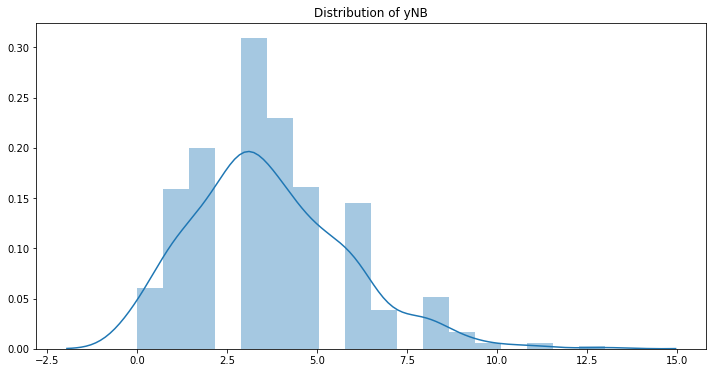

In [9]:
np.random.seed(123)
## using the same X
yNB = np.random.negative_binomial(15, 0.8, y.shape)

fig, ax=plt.subplots(1,1,figsize=(12,6))
sns.distplot(yNB, ax=ax);
plt.title('Distribution of yNB');

In [10]:
mod = enet.ElasticNet(X,yNB,offset=None,x_std=True,y_std=False,alpha=1.0,depth=99,tol=1e-9,fam='NegBin',
                      manual_lam_seq=None)

mod.fit()

sm = sma.NegativeBinomial(yNB,sma.add_constant(X)).fit(maxiter=1000,method='bfgs')

Optimization terminated successfully.
         Current function value: 2.115911
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21


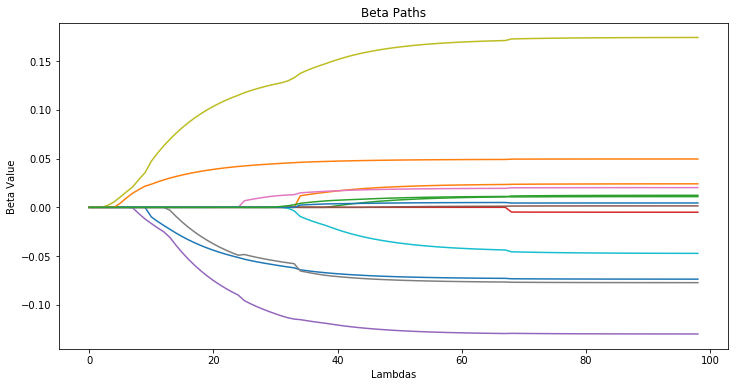

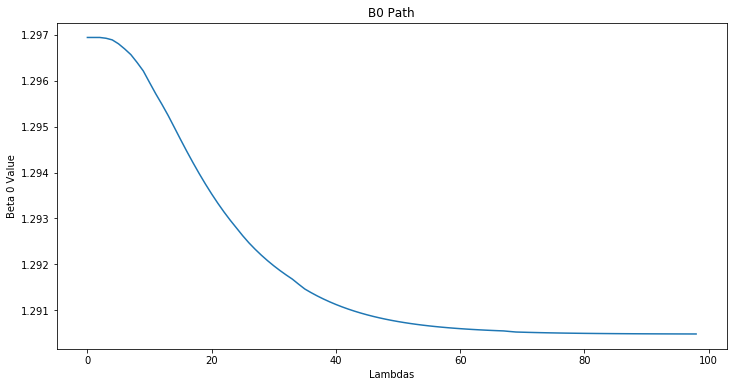

In [11]:
fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(mod.B.T);
plt.title('Beta Paths');
plt.xlabel('Lambdas');
plt.ylabel('Beta Value');

fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(mod.B0.T);
plt.title('B0 Path'); plt.xlabel('Lambdas'); plt.ylabel('Beta 0 Value');

In [12]:
temp = np.insert(mod.B.T[-1],0,mod.B0.T[-1])
temp = np.insert(temp, len(temp), mod.K[:,-1])

index = np.insert(fn,0,'Constant')
index = np.insert(index,len(index),'Dispersion')
chk = pd.concat( [ pd.DataFrame(np.round(temp.reshape(-1,1),6), index=index),
                   pd.DataFrame(np.round(sm.params.reshape(-1,1),6), index=index)],
                   axis=1, join='outer')
chk.columns = ['NegBin Lasso Soln','StatsModels NegBin Soln']
chk

,NegBin Lasso Soln,StatsModels NegBin Soln
Constan,1.290480,1.290477
CRIM,-0.073648,-0.073674
ZN,0.024124,0.024164
INDUS,0.012353,0.012412
CHAS,-0.005017,-0.005027
NOX,-0.129899,-0.129943
RM,0.001481,0.001485
AGE,0.020221,0.020235
DIS,-0.077255,-0.077282
RAD,0.174257,0.174390


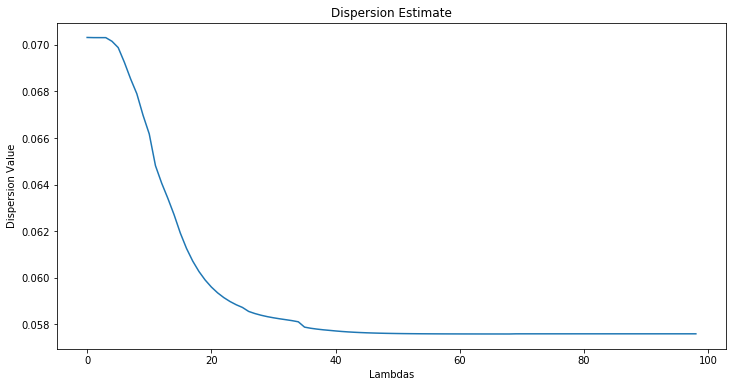

In [13]:
fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(mod.K.T);
plt.title('Dispersion Estimate');
plt.xlabel('Lambdas');
plt.ylabel('Dispersion Value');

We did not standardize the target due to it being a Neg Bin dispersion, thus the constant is not 0.

### Poisson Data

C:\Users\schillw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


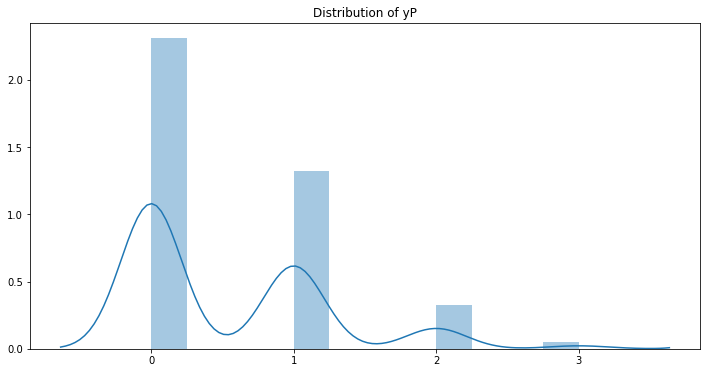

In [14]:
np.random.seed(123)
## using the same X
yP = np.random.poisson(0.5, y.shape)

fig, ax=plt.subplots(1,1,figsize=(12,6))
sns.distplot(yP, ax=ax);
plt.title('Distribution of yP');

In [15]:
mod = enet.ElasticNet(X,yP,offset=None,x_std=True,y_std=False,alpha=1.0,depth=99,tol=1e-5,fam='Poisson',
                      manual_lam_seq=None)

mod.fit()

sm = sma.Poisson(yP,sma.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.935164
         Iterations 5


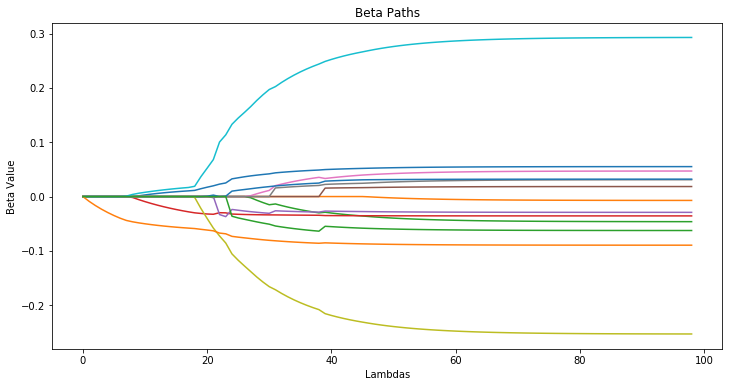

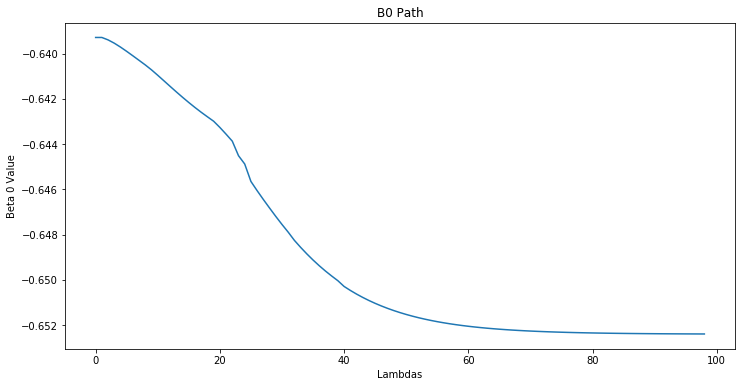

In [16]:
fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(mod.B.T);
plt.title('Beta Paths');
plt.xlabel('Lambdas');
plt.ylabel('Beta Value');

fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(mod.B0.T);
plt.title('B0 Path'); plt.xlabel('Lambdas'); plt.ylabel('Beta 0 Value');

In [17]:
temp = np.insert(mod.B.T[-1],0,mod.B0.T[-1])
# temp = np.insert(temp, len(temp), mod.K[:,-1])

index = np.insert(fn,0,'Constant')
# index = np.insert(index,len(index),'Dispersion')
chk = pd.concat( [ pd.DataFrame(np.round(temp.reshape(-1,1),6), index=index),
                   pd.DataFrame(np.round(sm.params.reshape(-1,1),6), index=index)],
                   axis=1, join='outer')
chk.columns = ['Poisson Lasso Soln','StatsModels Poisson Soln']
chk

,Poisson Lasso Soln,StatsModels Poisson Soln
Constan,-0.652396,-0.652408
CRIM,0.055094,0.055123
ZN,-0.007130,-0.007187
INDUS,-0.046235,-0.046329
CHAS,-0.035615,-0.035615
NOX,-0.029084,-0.029081
RM,0.018423,0.018441
AGE,0.046975,0.047027
DIS,0.030986,0.031035
RAD,-0.252951,-0.253146


### Logit Data

C:\Users\schillw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


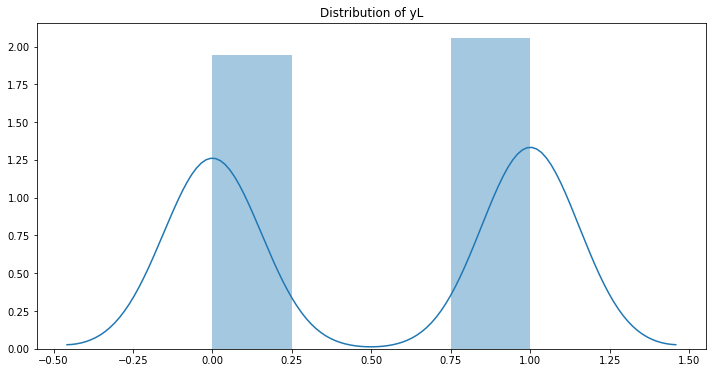

In [18]:
np.random.seed(123)
## using the same X
yL = np.random.randint(0,2,y.shape)

fig, ax=plt.subplots(1,1,figsize=(12,6))
sns.distplot(yL, ax=ax);
plt.title('Distribution of yL');

In [19]:
mod = enet.ElasticNet(X,yL,offset=None,x_std=False,y_std=False,alpha=1.0,depth=99,tol=1e-5,fam='Logit',
                      manual_lam_seq=None)

mod.fit()

sm = sma.Logit(yL,sma.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.680536
         Iterations 5


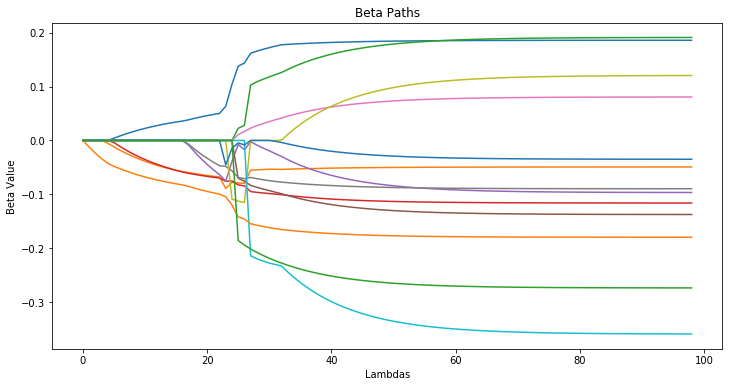

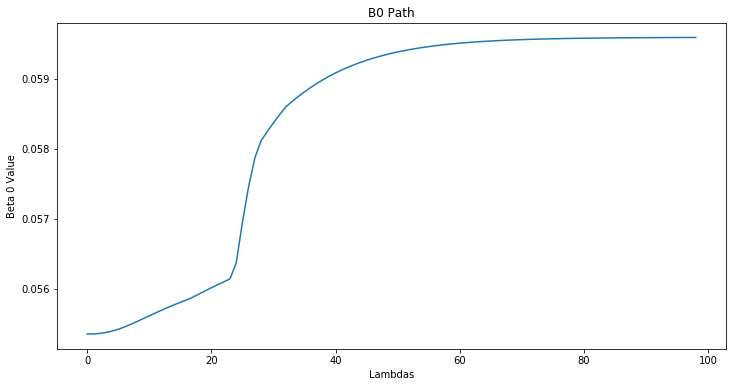

In [20]:
fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(mod.B.T);
plt.title('Beta Paths');
plt.xlabel('Lambdas');
plt.ylabel('Beta Value');

fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(mod.B0.T);
plt.title('B0 Path'); plt.xlabel('Lambdas'); plt.ylabel('Beta 0 Value');

In [21]:
temp = np.insert(mod.B.T[-1],0,mod.B0.T[-1])
# temp = np.insert(temp, len(temp), mod.K[:,-1])

index = np.insert(fn,0,'Constant')
# index = np.insert(index,len(index),'Dispersion')
chk = pd.concat( [ pd.DataFrame(np.round(temp.reshape(-1,1),6), index=index),
                   pd.DataFrame(np.round(sm.params.reshape(-1,1),6), index=index)],
                   axis=1, join='outer')
chk.columns = ['Logit Lasso Soln','StatsModels Logit Soln']
chk

,Logit Lasso Soln,StatsModels Logit Soln
Constan,0.059591,0.059593
CRIM,0.186018,0.186029
ZN,-0.049273,-0.049260
INDUS,0.191232,0.191392
CHAS,-0.116211,-0.116247
NOX,-0.096669,-0.096818
RM,-0.137521,-0.137609
AGE,0.080678,0.080766
DIS,-0.089690,-0.089713
RAD,0.120575,0.120881


Since the coordinate descent algorithm is home made and based on convergence of the Beta values, its tolerance could be better. There may also be a convenient way to write the convergence into sklearn and use it there as well but I havent gotten than far.